Use [geotiler](https://github.com/wrobell/geotiler/) to download map data and plot some points on it.
The code is based on the [geotiler matplotlib example](https://github.com/wrobell/geotiler/blob/master/examples/ex-matplotlib.py).

In [1]:
import matplotlib.pyplot as plt
import geotiler
%matplotlib inline

In [2]:
bbox = 11.78560, 46.48083, 11.79067, 46.48283
mm = geotiler.Map(extent=bbox, zoom=18)
img = geotiler.render_map(mm)

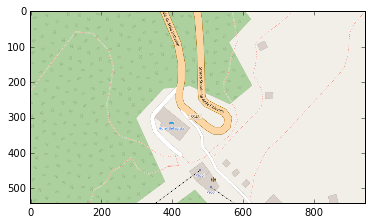

In [3]:
plt.imshow(img)
plt.show()

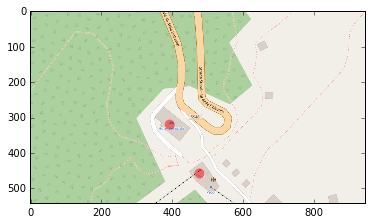

In [4]:
x0, y0 = 11.78816, 46.48114 # http://www.openstreetmap.org/search?query=46.48114%2C11.78816
x1, y1 = 11.78771, 46.48165 # http://www.openstreetmap.org/search?query=46.48165%2C11.78771
points = ((x0, y0), (x1, y1))
x, y = zip(*(mm.rev_geocode(p) for p in points))
plt.scatter(x, y, c='red', edgecolor='none', s=100, alpha=0.5)
plt.imshow(img)
plt.show()

The code below is based on [this python4oceanographers blog post](https://ocefpaf.github.io/python4oceanographers/blog/2014/08/18/gpx/).

In [5]:
import gpxpy
import mplleaflet
import glob
import os
from pandas import DataFrame

In [6]:
def load_run_data(gpx_path, filter=""):
    gpx_files = glob.glob(os.path.join(gpx_path, filter + "*.gpx"))
    run_data = []
    for file_idx, gpx_file in enumerate(gpx_files): 
        gpx = gpxpy.parse(open(gpx_file, 'r'))
        # Loop through tracks
        for track_idx, track in enumerate(gpx.tracks):
            track_name = track.name
            track_time = track.get_time_bounds().start_time
            track_length = track.length_3d()
            track_duration = track.get_duration()
            track_speed = track.get_moving_data().max_speed
            
            for seg_idx, segment in enumerate(track.segments):
                segment_length = segment.length_3d()
                for point_idx, point in enumerate(segment.points):
                    run_data.append([file_idx, os.path.basename(gpx_file), track_idx, track_name, 
                                     track_time, track_length, track_duration, track_speed, 
                                     seg_idx, segment_length, point.time, point.latitude, 
                                     point.longitude, point.elevation, segment.get_speed(point_idx)])
    return run_data

In [7]:
data = load_run_data(gpx_path='.', filter="")
df = DataFrame(data, columns=['File_Index', 'File_Name', 'Index', 'Name',
                              'Time', 'Length', 'Duration', 'Max_Speed',
                              'Segment_Index', 'Segment_Length', 'Point_Time', 'Point_Latitude',
                              'Point_Longitude', 'Point_Elevation', 'Point_Speed'])

df.head()

,File_Index,File_Name,Index,Name,Time,Length,Duration,Max_Speed,Segment_Index,Segment_Length,Point_Time,Point_Latitude,Point_Longitude,Point_Elevation,Point_Speed
0,0,2016-12-09 13_23_51.gpx,0,2016-12-09 13:23:51,2016-12-09 12:23:51,454.475797,98,8.789511,0,171.931512,2016-12-09 12:23:51,46.954818,7.428292,557.690186,NaN
1,0,2016-12-09 13_23_51.gpx,0,2016-12-09 13:23:51,2016-12-09 12:23:51,454.475797,98,8.789511,0,171.931512,2016-12-09 12:23:52,46.954834,7.428256,557.071655,3.555040
2,0,2016-12-09 13_23_51.gpx,0,2016-12-09 13:23:51,2016-12-09 12:23:51,454.475797,98,8.789511,0,171.931512,2016-12-09 12:23:53,46.954850,7.428212,557.034668,3.407620
3,0,2016-12-09 13_23_51.gpx,0,2016-12-09 13:23:51,2016-12-09 12:23:51,454.475797,98,8.789511,0,171.931512,2016-12-09 12:23:54,46.954860,7.428174,556.886230,3.619127
4,0,2016-12-09 13_23_51.gpx,0,2016-12-09 13:23:51,2016-12-09 12:23:51,454.475797,98,8.789511,0,171.931512,2016-12-09 12:23:55,46.954873,7.428124,555.893555,4.337601


In [30]:
df = df.dropna()
for i in range(8):
    plt.plot(df['Point_Longitude'][df['File_Index']==i],
             df['Point_Latitude'][df['File_Index']==i],
             color='black', linewidth=5, alpha=0.9)
mplleaflet.display(tiles='stamen_wc')